In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
daily_train = pd.read_csv('Dataset/Train/Daily-train.csv')
daily_test = pd.read_csv('Dataset/Test/Daily-test.csv')
info = pd.read_csv('Dataset/M4-info.csv')

<AxesSubplot: >

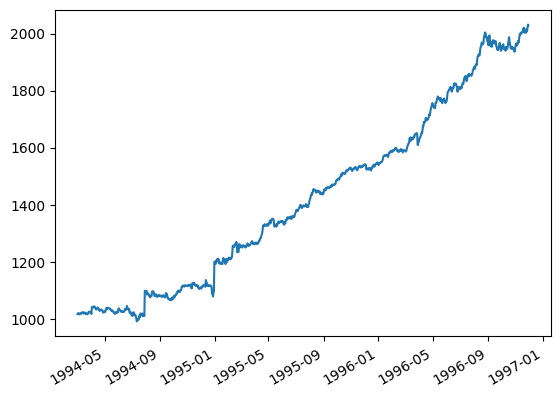

In [3]:
y_train = daily_train.iloc[0,:][1:].dropna()
series_name = daily_train.iloc[0,:][0]
start_index = info[info['M4id']==series_name]
index = pd.date_range(start_index['StartingDate'].iloc[0],periods=len(y_train),freq='D')
y_train.index = index
y_train= y_train.astype('float')
y_train.plot()

<AxesSubplot: >

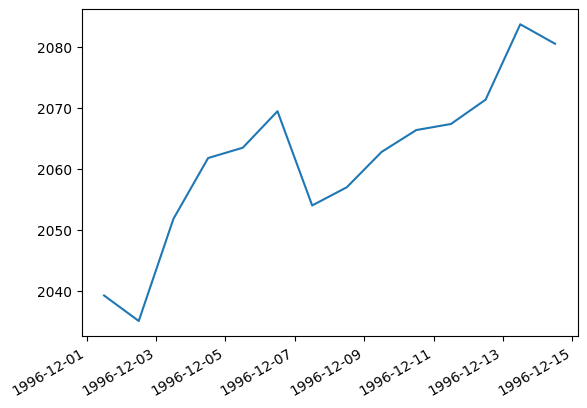

In [10]:
y_test = daily_test.iloc[0,:][1:].dropna()
start_index = y_train.index[-1]  + pd.DateOffset(1)
index = pd.date_range(start_index,periods=len(y_test),freq='D')
y_test.index = index
y_test= y_test.astype('float')
y_test.plot()

In [8]:
from sktime.forecasting.model_selection import SlidingWindowSplitter
from hmmlearn import hmm
np.random.seed(42)
hmm_model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)

In [12]:
y_train

1994-03-01 12:00:00    1017.1
1994-03-02 12:00:00    1019.3
1994-03-03 12:00:00    1017.0
1994-03-04 12:00:00    1019.2
1994-03-05 12:00:00    1018.7
                        ...  
1996-11-26 12:00:00    2015.6
1996-11-27 12:00:00    2009.7
1996-11-28 12:00:00    2022.1
1996-11-29 12:00:00    2031.6
1996-11-30 12:00:00    2029.7
Freq: D, Name: 0, Length: 1006, dtype: float64

In [13]:
comb_y = pd.concat([y_train,y_test])

In [16]:
comb_y.shape[0]

(1020,)

In [25]:
y_test.shape

(14,)

In [26]:
splitter = SlidingWindowSplitter(fh=[1], window_length=y_train.shape[0])

In [36]:
predictions = []
for split in splitter.split(comb_y):
    y = comb_y.iloc[split[0]].values.reshape(-1,1)
    hmm_model.fit(y)
    predictions.append(hmm_model.decode(y)[1][-1]) 



Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


In [37]:
predictions

[1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0]